In [15]:
###### 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn import cluster
import pandas as pd
import copy

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.utils import resample,shuffle
from sklearn.cross_validation import cross_val_score
import itertools

### 1. Load Data

In [5]:
# cd
# cd desktop

C:\Users\A458497


In [91]:
cd

C:\Users\A458497


In [92]:
cd desktop

C:\Users\A458497\desktop


#### 1.1 Business_Unit-Filial

In [20]:
xl_bu=pd.ExcelFile("BU_hier.xlsx")
bu_hier=xl_bu.parse('Sheet1')
bu_hier["fil"]=pd.DataFrame([str(i)[:3] for i in bu_hier.Column6])

In [24]:
bu_hier.shape[0]

105

In [10]:
bu_hier.columns

Index(['Column6', 'SSC', 'Région', 'Pole', 'BUSINESS_UNIT', 'DESCR BU', 'fil'], dtype='object')

In [11]:
bu_fil=bu_hier[["BUSINESS_UNIT","fil"]][bu_hier.fil=='Fil'].drop_duplicates()
bu_fil.fil=1

#### 1.2 Train data

In [142]:
cd desktop

C:\Users\A458497\desktop


In [143]:
xl=pd.ExcelFile("facture_comptabilisées_BEX_062016_042017_v2.xlsx")
df=xl.parse('Sheet 1')

df['c1']=pd.DataFrame([str(i)[:1] for i in df.ACCOUNT])
df['c3']=pd.DataFrame([str(i)[:3] for i in df.ACCOUNT])


In [144]:
df["count"]=1
df=df[~df.ACCOUNT.isnull()]

In [ ]:
df=df[~df.ACCOUNT.isnull()]

In [138]:
df['c3']=pd.DataFrame([str(i) for i in df.ACCOUNT])

In [145]:
df[df.VENDOR_ID==4]

,BUSINESS_UNIT,VENDOR_SETID,VENDOR_ID,MONETARY_AMOUNT,VAT_INV_AMT_GL,CURRENCY_CD,ASSET_FLG,VOUCHER_ID,VOUCHER_LINE_NUM,DISTRIB_LINE_NUM,...,VAT_SERVICE_TYPE,ACCOUNT,ALTACCT,TAX_CD_VAT,DESCR,VNDR_FIELD_C30_J,ACTIVE_FLG,c1,c3,count
2608,IT001,FR001,4,8783.89,1577.00,EUR,N,10760101,1,1,...,2.0,99652371.0,NaN,FRNOR,PRESTA.INFORMATIQUES ATG - HTR,2.100000e+09,N,9,996,1
2630,IT001,FR001,4,9134.80,1640.00,EUR,N,10760105,1,1,...,2.0,99652371.0,NaN,FRNOR,PRESTA.INFORMATIQUES ATG - HTR,2.100000e+09,N,9,996,1
2644,IT001,FR001,4,8689.20,1560.00,EUR,N,10760106,1,1,...,2.0,99640012.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
18738,DF001,FR001,4,398482.55,71540.85,EUR,N,00001268,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
18740,IT001,FR001,4,23042.10,4136.82,EUR,N,00000636,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
18741,IT001,FR001,4,4.42,0.79,EUR,N,00000637,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
18744,IT001,FR001,4,873.09,156.75,EUR,N,00000639,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
26715,DF001,FR001,4,16.70,3.00,EUR,N,10787059,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
37872,IT001,FR001,4,20728.54,3721.46,EUR,N,00000682,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1
37873,IT001,FR001,4,2.18,0.39,EUR,N,00000683,1,1,...,2.0,99645276.0,NaN,FRNOR,NaN,2.100000e+09,N,9,996,1


In [161]:
df_996=df[df.c3=='996'][~df.VENDOR_ID.isin(v_11.VENDOR_ID)][~df.VENDOR_ID.isin(v_1_996.VENDOR_ID)]

c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


#### 1.3 Test data

In [4]:
# cd compte_pre

In [117]:
xl_re=pd.ExcelFile("facture_pred_v3.xlsx")
df_p=xl_re.parse('Sheet1')

In [52]:
df_p["NEW_ACCOUNT"]="N"

In [56]:
a=4
b=(1,4)

In [60]:
if a not in (b):
    print('haha')

In [111]:
c=df[["VENDOR_ID",'count']].groupby("VENDOR_ID").count().reset_index()

In [112]:
d=df[["VENDOR_ID",'ACCOUNT']].groupby("VENDOR_ID").ACCOUNT.nunique().reset_index()

In [120]:
e=d.merge(c,on='VENDOR_ID',how='left')

In [121]:
e.to_excel("VENDOR_LINE.xlsx")

In [55]:
df_acc=df_p[df_p.DIFF!=0][~df_p.flag.isnull()]

c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [17]:
# df_acc[df_acc.VENDOR_ID==5288].flag.isin(df[df.VENDOR_ID==5288].ACCOUNT)

In [18]:
# for  v in df_acc.VENDOR_ID:
#     print(v)
#     for index in df_p[df_p.VENDOR_ID==v][~df_p.flag.isnull()][~df_p.flag.isin(df[df.VENDOR_ID==v].ACCOUNT)].index:
#         df_p.loc[df.index==index , "NEW_ACCOUNT"] = 'Y'

In [14]:
# df_p.loc[[df_p.VENDOR_ID==5288][~df_p.flag.isnull()][~df_p.flag.isin(df[df.VENDOR_ID==5288].ACCOUNT)],'NEW_ACCOUNT']="YES"

In [84]:
df_p[df_p.index==461].index="Y"

c:\homeware\anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [95]:
df_p.loc[df.index==461 , "NEW_ACCOUNT"] = 'Y'

In [104]:
df_p["VENDOR_NEW"]=~df_p.VENDOR_ID.isin(df.VENDOR_ID)*1

In [109]:
df_p[df_p.NEW_VENDOR!=df_p.VENDOR_NEW]

,BUSINESS_UNIT,VENDOR_SETID,VENDOR_ID,MONETARY_AMOUNT,VAT_INV_AMT_GL,CURRENCY_CD,ASSET_FLG,Column1,VOUCHER_ID,VOUCHER_LINE_NUM,...,Predicted_993,Predicted_996,Predicted_33,ACCOUNT_y,ACCOUNT_993,ACCOUNT_996,ALL,DIFF,NEW_ACCOUNT,VENDOR_NEW


In [19]:
# df_p[df_p.VENDOR_ID==5288][~df_p.flag.isnull()].NEW_ACCOUNT

In [101]:
df_p.to_excel("facture_pred_v10.xlsx")

### 2. Generate new variables

#### 2.1 Probality per Vendor

In [151]:
ga=df[["VENDOR_ID","ACTIVE_FLG","count"]].groupby(["VENDOR_ID","ACTIVE_FLG"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gga=df[["VENDOR_ID"]].drop_duplicates()
for name,group in ga.groupby(level=1):
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "AC_"+str(name)})
    gga=gga.merge(gi,on='VENDOR_ID',how='left')
gga=gga.fillna(0.0)

In [26]:
g=df[["VENDOR_ID","c1","count"]].groupby(["VENDOR_ID","c1"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg=df[["VENDOR_ID"]].drop_duplicates()
for name,group in g.groupby(level=1):
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c1_"+str(name)})
    gg=gg.merge(gi,on='VENDOR_ID',how='left')
gg=gg.fillna(0.0)

In [27]:
g3=df[["VENDOR_ID","c3","count"]][df.c1=='9'].groupby(["VENDOR_ID","c3"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())

In [32]:
g3=df[["VENDOR_ID","c3","count"]][df.c1=='9'].groupby(["VENDOR_ID","c3"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg3=df[["VENDOR_ID"]][df.c1=='9'].drop_duplicates()
for name,group in g3.groupby(level=1):
#   print(name)
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c3_"+str(name)})
    gg3=gg3.merge(gi,on='VENDOR_ID',how='left')
gg3=gg3.fillna(0.0)

In [69]:
df.VENDOR_ID.unique().shape

(8784,)

In [702]:
df[df.c1=='9'].VENDOR_ID.unique().shape

(8379,)

In [30]:
g3_c=df[['VNDR_FIELD_C30_J',"c3","count"]][df.c1=='9'].groupby(['VNDR_FIELD_C30_J',"c3"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg3_c=df[['VNDR_FIELD_C30_J']].drop_duplicates()
for name,group in g3_c.groupby(level=1):
#   print(name)
    gi=pd.DataFrame(group.reset_index())[['VNDR_FIELD_C30_J',"count"]]
    gi = gi.rename(columns={'count': "c3_"+str(name)})
    gg3_c=gg3_c.merge(gi,on='VNDR_FIELD_C30_J',how='left')
gg3_c=gg3_c.fillna(0.0)

In [34]:
g_994=df[["VENDOR_ID","ACCOUNT","count"]][df.c3=='994'].groupby(["VENDOR_ID","ACCOUNT"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg_994=df[["VENDOR_ID"]][df.c3=='994'].drop_duplicates()
for name,group in g_994.groupby(level=1):
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c994_"+str(name)})
    gg_994=gg_994.merge(gi,on='VENDOR_ID',how='left')
    gg_994=gg_994.fillna(0.0)
gg_994=gg_994.drop_duplicates()

In [17]:
g_997=df[["VENDOR_ID","ACCOUNT","count"]][df.c3=='997'].groupby(["VENDOR_ID","ACCOUNT"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg_997=df[["VENDOR_ID"]][df.c3=='997'].drop_duplicates()
for name,group in g_997.groupby(level=1):
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c997_"+str(name)})
    gg_997=gg_997.merge(gi,on='VENDOR_ID',how='left')
    gg_997=gg_997.fillna(0.0)
gg_997=gg_997.drop_duplicates()

In [35]:
g_993=df[["VENDOR_ID","ACCOUNT","count"]][df.c3=='993'].groupby(["VENDOR_ID","ACCOUNT"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg_993=df[["VENDOR_ID"]][df.c3=='993'].drop_duplicates()
for name,group in g_993.groupby(level=1):
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c993_"+str(name)})
    gg_993=gg_993.merge(gi,on='VENDOR_ID',how='left')
    gg_993=gg_993.fillna(0.0)


In [105]:
df_996['count']=1

In [111]:
df_996.VENDOR_ID.unique()

array([1000000001, 1000000666, 1000000017, ..., 1000007752,      17719,
            17777], dtype=int64)

In [157]:
dic_996_y={}

In [162]:
# df_966

In [164]:
# df_996[df_996.VENDOR_ID==4].ACCOUNT  

In [129]:
df_996.c3.unique()

array(['996'], dtype=object)

In [171]:
for v_id in df_996.VENDOR_ID.unique():
    dic_996_y[str(v_id)]=np.sort(df_996[df_996.VENDOR_ID==v_id].ACCOUNT.unique())

In [172]:
dic_996_y["4"]

array([ 99640012.,  99645276.,  99646159.,  99652371.,  99655101.])

In [110]:
g_996=df_996[["VENDOR_ID","ACCOUNT","count"]].groupby(["VENDOR_ID","ACCOUNT"])["count"].sum().groupby(level = 0).transform(lambda x: x/x.sum())
gg_996=df_996[["VENDOR_ID"]].drop_duplicates()
for name,group in g_996.groupby(level=1):
    print(name)
    print("group:",group)
    gi=pd.DataFrame(group.reset_index())[["VENDOR_ID","count"]]
    gi = gi.rename(columns={'count': "c993_"+str(name)})
    print(gi)
    gg_996=gg_996.merge(gi,on='VENDOR_ID',how='left')
    gg_996=gg_996.fillna(0.0)


105200.0
group: VENDOR_ID  ACCOUNT 
4884       105200.0    0.003846
Name: count, dtype: float64
   VENDOR_ID  c993_105200.0
0       4884       0.003846
106200.0
group: VENDOR_ID  ACCOUNT 
4884       106200.0    0.003846
Name: count, dtype: float64
   VENDOR_ID  c993_106200.0
0       4884       0.003846
231000.0
group: VENDOR_ID  ACCOUNT 
328        231000.0    0.5
Name: count, dtype: float64
   VENDOR_ID  c993_231000.0
0        328            0.5
231800.0
group: VENDOR_ID  ACCOUNT 
7492       231800.0    0.125
Name: count, dtype: float64
   VENDOR_ID  c993_231800.0
0       7492          0.125
231801.0
group: VENDOR_ID  ACCOUNT 
16718      231801.0    0.5
Name: count, dtype: float64
   VENDOR_ID  c993_231801.0
0      16718            0.5
238800.0
group: VENDOR_ID  ACCOUNT 
16326      238800.0    0.333333
Name: count, dtype: float64
   VENDOR_ID  c993_238800.0
0      16326       0.333333
276800.0
group: VENDOR_ID  ACCOUNT 
5526       276800.0    0.008333
Name: count, dtype: float64
   VE

KeyboardInterrupt: 

#### 2.2 VENDOR_ID only one Account

In [147]:
v=df[["VENDOR_ID","ACCOUNT"]]
v_1=v.groupby('VENDOR_ID').ACCOUNT.nunique().reset_index()
v_11=v_1[v_1.ACCOUNT==1]
v_11=v_11[["VENDOR_ID"]].merge(df[["VENDOR_ID","ACCOUNT"]].drop_duplicates(),on="VENDOR_ID",how='left')

In [148]:
v=df[["VENDOR_ID","ACCOUNT"]][df.c3=='996']
v_1=v.groupby('VENDOR_ID').ACCOUNT.nunique().reset_index()
v_1_996=v_1[v_1.ACCOUNT==1]
v_1_996=v_1_996[["VENDOR_ID"]].merge(df[["VENDOR_ID","ACCOUNT"]][df.c3=='996'].drop_duplicates(),on="VENDOR_ID",how='left')

In [41]:
v=df[["VENDOR_ID","ACCOUNT"]][df.c3=='993']
v_1=v.groupby('VENDOR_ID').ACCOUNT.nunique().reset_index()
v_1_993=v_1[v_1.ACCOUNT==1]
v_1_993=v_1_993[["VENDOR_ID"]].merge(df[["VENDOR_ID","ACCOUNT"]][df.c3=='993'].drop_duplicates(),on="VENDOR_ID",how='left')

In [43]:
v=df[["VENDOR_ID","ACCOUNT"]][df.c3=='997']
v_1=v.groupby('VENDOR_ID').ACCOUNT.nunique().reset_index()
v_1_997=v_1[v_1.ACCOUNT==1]

In [44]:
v=df[["VENDOR_ID","ACCOUNT"]][df.c3=='994']
v_1=v.groupby('VENDOR_ID').ACCOUNT.nunique().reset_index()
v_1_994=v_1[v_1.ACCOUNT==1]

In [6]:
# tt=v_1_996[~v_1_996.VENDOR_ID.isin(v_11.VENDOR_ID)]

In [7]:
# df.DESCR.unique()

### 3.Train Prediction Model 

#### 3.1 Function Draw feature importance 

#### 3.2 Prepare train & test data

In [44]:
import pickle
import os
os.chdir(r'C:\Users\A458497\desktop')
dic=pickle.load(open("dic_996.p","rb"))
dic_cols=pickle.load(open("dic_cols.p","rb"))
# v_1=pd.ExcelFile("v_1.xlsx").parse("Sheet1")
# v_1.rename(columns={"ACCOUNT":"ACCOUNT_u"},inplace=True)
col_1=dic_cols["col_1"]
col_3=dic_cols["col_3"]
cols=dic_cols["cols"]
col_996=dic_cols["col_996"]
col_all_1=dic_cols["col_all_1"]
col_all_3=dic_cols["col_all_3"]
col_all_993=dic_cols["col_all_997"]
col_all_994=dic_cols["col_all_997"]
col_all_994=dic_cols["col_all_997"]

#### 3.3 Lissage model

In [ ]:
pos=df[df.ACTIVE_FLG=='N']
a=shuffle(pos)
t,l=train_test_split(a,test_size=0.984)
n=df[df.ACTIVE_FLG=='Y']
frames = [t,n]
result = pd.concat(frames)
dt=shuffle(result)
col=['MONETARY_AMOUNT',
     'OPRID',
     'VAT_INV_AMT_GL',
     'CURRENCY_CD',
     'ASSET_FLG',
     'PHYSICAL_NATURE',
     'VAT_TREATMENT_GRP',
     'VAT_APPLICABILITY',
     'VAT_TREATMENT',
     'TAX_CD_VAT',
     'VENDOR_ID',
     'BUSINESS_UNIT']
x=dt[col]
x=x.merge(gga,on="VENDOR_ID",how="left")
x=x.drop("VENDOR_ID",1)
x=pd.get_dummies(x)
y=dt.ACTIVE_FLG
clfa=RandomForestClassifier( n_estimators=100,max_features=x.shape[1])
# scores=cross_val_score(clfa,x,y,cv=10)
clfa.fit(x,y)

#### 3.4 Firt Number Prediction Model

Merge the test dataframe with prepared business_unit-fil table on BUSINESS_UNIT 

If Business_unit is not filial then the account will start with '9'.

In [133]:
df_x=df_p[["BUSINESS_UNIT"]]

In [134]:
# df_x=df_x.merge(gg,how='left',on="VENDOR_ID")
df_x=df_x.merge(bu_fil,how='left',on="BUSINESS_UNIT")
df_x=df_x.drop("BUSINESS_UNIT",1)

In [142]:
df_p["Predicted_1"]=~(df_x.fil==1)*9

#### 3.5 First Three Number Prediction Model
Predict_3

In [490]:
df.columns

Index(['BUSINESS_UNIT', 'VENDOR_SETID', 'VENDOR_ID', 'MONETARY_AMOUNT',
       'VAT_INV_AMT_GL', 'CURRENCY_CD', 'ASSET_FLG', 'VOUCHER_ID',
       'VOUCHER_LINE_NUM', 'DISTRIB_LINE_NUM', 'OPRID', 'PHYSICAL_NATURE',
       'VAT_TREATMENT_GRP', 'COUNTRY_LOC_BUYER', 'COUNTRY_LOC_SELLER',
       'VAT_USE_ID', 'VAT_APPLICABILITY', 'VAT_TREATMENT', 'VAT_SERVICE_TYPE',
       'ACCOUNT', 'ALTACCT', 'TAX_CD_VAT', 'DESCR', 'VNDR_FIELD_C30_J',
       'ACTIVE_FLG', 'c1', 'c3', 'count'],
      dtype='object')

In [48]:
col_33=['MONETARY_AMOUNT', 'ASSET_FLG',
        'VENDOR_ID','TAX_CD_VAT', "ACTIVE_FLG"]

In [49]:
dt_3=df[df.c1=='9']

In [52]:
### Downsampling class c3=996
b=resample(dt_3[dt_3.c3=='996'], random_state=0,n_samples=16977)
dt_3=dt_3[dt_3.c3!='996'].append(b)
dt_3=shuffle(dt_3,random_state=0)

In [63]:
x_3=dt_3[col_33]
y_3=dt_3[["c3"]]
x_3=x_3.merge(gg3,how='left',on='VENDOR_ID')
x_3=x_3.drop('VENDOR_ID',1)
x_3=pd.get_dummies(x_3)
x_3=x_3.fillna(0)

In [34]:
x_3.columns

Index(['MONETARY_AMOUNT', 'ASSET_FLG', 'TAX_CD_VAT', 'ACTIVE_FLG', 'c3_990',
       'c3_991', 'c3_992', 'c3_993', 'c3_994', 'c3_996', 'c3_997'],
      dtype='object')

In [10]:
y_3[~y_3.c3.isin(['993','996'])]='000'
y_33=y_3.c3

In [64]:
clf3=RandomForestClassifier(n_estimators=100,max_features=x_3.shape[1])

In [3]:
scores_3=cross_val_score(clf3,x_3,y_33,cv=10)

In [641]:
print(scores_3.mean(),scores_3.std() )

New column AVTIVE_FLG
0.988433086899 0.000780131590085


In [846]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y_33, random_state=0,test_size=0.1)

In [65]:
clf3.fit(x_3,y_33)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=24, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [848]:
y_p=clf3.predict(X_test)

In [580]:
clf3.score(X_test,y_test)

0.99021029731689625

In [ ]:
cnf_matrix=confusion_matrix(y_test, y_p)
class_names=['000','993','996']

Confusion matrix, without normalization
[[   15     0    12]
 [    0  1660    62]
 [   10    51 11980]]


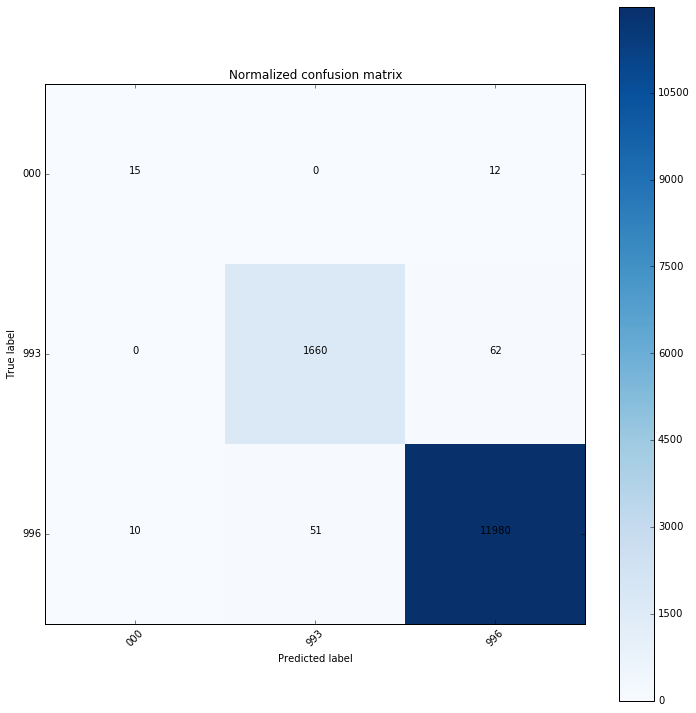

In [584]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

In [11]:
# feature_draw_plotly(X_train,clf3)

Normalized confusion matrix
[[  7.64705882e-01   5.88235294e-02   1.76470588e-01]
 [  6.09013398e-04   9.82947625e-01   1.64433618e-02]
 [  1.71330668e-03   9.13763564e-03   9.89149058e-01]]


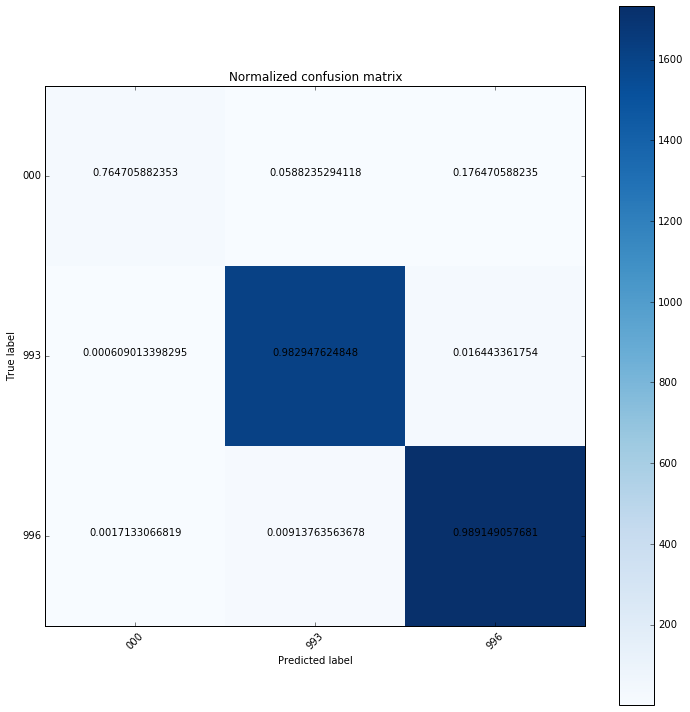

In [861]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#### 3.6  993XXXXX Prediction Model

In [2]:
# df[df.c3=='993'][~df.VENDOR_ID.isin(v_11.VENDOR_ID)][~df.VENDOR_ID.isin(v_1_993.VENDOR_ID)].groupby(['ACCOUNT']).count()

In [69]:
dt_993=df[df.c3=='993']

In [67]:
cols=[
 'VENDOR_ID',
 'MONETARY_AMOUNT','VAT_TREATMENT_GRP',
 'VAT_APPLICABILITY',
 'ASSET_FLG',
 'PHYSICAL_NATURE',
 'TAX_CD_VAT']

In [70]:
x_993=dt_993[cols]
y_993=dt_993.ACCOUNT
x_993=x_993.merge(gg_993,how='left',on='VENDOR_ID')
x_993=x_993.drop('VENDOR_ID',1)
x_993=pd.get_dummies(x_993)
x_993=x_993.fillna(0)

In [71]:
clf=RandomForestClassifier(n_estimators=100,max_features=x_993.shape[1])

In [72]:
clf.fit(x_993,y_993)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=42, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
scores=cross_val_score(clf,x_993,y_993,cv=10)

c:\homeware\anaconda3\lib\site-packages\sklearn\cross_validation.py:516: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.



In [106]:
print(scores.mean(),scores.std())

0.992043864207 0.0030016065021


In [97]:
X_train, X_test, y_train, y_test = train_test_split(x_993, y_993, random_state=0,test_size=0.2)

In [138]:
clf.fit(X_train,y_train)
y_p=clf.predict(X_test)
print(clf.score(X_test,y_test))

In [99]:
y_test.unique()

array([ 99380122.,  99311341.,  99311432.,  99380130.,  99316449.,
        99310202.,  99307331.,  99326133.,  99326802.,  99365099.,
        99380031.,  99315201.,  99311366.,  99380049.,  99318486.,
        99327602.,  99327560.,  99311119.])

In [56]:
import collections

In [89]:
cnf_matrix=confusion_matrix(y_test, y_p)

In [65]:
import itertools

In [139]:
# plot_confusion_matrix(cnf_matrix, classes=counter.keys(), normalize=False,
#                       title='Normalized confusion matrix')
# feature_draw_plotly(X_test,clf)

#### 3.7  996XXXXX Prediction Model

In [16]:
df['DESC_1']=pd.DataFrame([str(i).lower().split(" ",1)[0] for i in df.DESCR])
df['DESC_2']=pd.DataFrame([str(i).lower().split(" ")[1] for i in df[df.DESC_1=='generic'].DESCR],index=df[df.DESC_1=='generic'].DESCR.index)

In [277]:
df.DESC_2=df.DESC_2.fillna(" ")

In [278]:
df.DESC_1=df.DESC_1+df.DESC_2

In [74]:
dt_996=df[df.c3=="996"][~df.VENDOR_ID.isin(v_11.VENDOR_ID)][~df.VENDOR_ID.isin(v_1_996.VENDOR_ID)]

c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [73]:
col_996=['MONETARY_AMOUNT',
 'ASSET_FLG',
 'PHYSICAL_NATURE',
 'VAT_TREATMENT_GRP',
 'VAT_APPLICABILITY',
 'VAT_TREATMENT',
 'TAX_CD_VAT',
 'BUSINESS_UNIT']

In [34]:
cd

C:\Users\A458497


In [35]:
cd desktop

C:\Users\A458497\desktop


In [36]:
cd compte_pre

C:\Users\A458497\desktop\compte_pre


In [37]:
cd model_996_1

C:\Users\A458497\desktop\compte_pre\model_996_1


In [75]:
f_996_notunique=dt_996[["VENDOR_ID","count"]].groupby("VENDOR_ID").count().reset_index()

In [76]:
dic={}
for index,row in f_996_notunique.iterrows(): 
    VENDOR_ID=int(row["VENDOR_ID"])
    dt_996_x=dt_996[col_996][dt_996.VENDOR_ID==VENDOR_ID]
    dt_996_x=pd.get_dummies(dt_996_x)
    dt_996_y=dt_996.ACCOUNT[dt_996.VENDOR_ID==VENDOR_ID]   
    
    dic[str(VENDOR_ID)]=dt_996_x.columns
    
    clf_996=RandomForestClassifier(n_estimators=50, max_features=dt_996_x.shape[1])
    clf_996.fit(dt_996_x,dt_996_y)
     
    newpath = r'model'+str(VENDOR_ID)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    os.chdir(newpath)
    filename = 'model_'+str(VENDOR_ID)+".sav"
    joblib.dump(clf_996, filename)
    os.chdir("../")

In [219]:
np.sum(f_996_notunique["count"])

103893

In [78]:
dic["121"]

Index(['MONETARY_AMOUNT', 'ASSET_FLG_N', 'PHYSICAL_NATURE_G',
       'PHYSICAL_NATURE_S', 'VAT_TREATMENT_GRP_DOMP', 'VAT_TREATMENT_GRP_EUP',
       'VAT_APPLICABILITY_T', 'VAT_TREATMENT_DGP', 'VAT_TREATMENT_DSP',
       'VAT_TREATMENT_ESP', 'TAX_CD_VAT_FR0', 'TAX_CD_VAT_FR000',
       'TAX_CD_VAT_FR1', 'TAX_CD_VAT_FR196', 'TAX_CD_VAT_FRNOR',
       'BUSINESS_UNIT_DF001', 'BUSINESS_UNIT_GIMS1', 'BUSINESS_UNIT_IT001'],
      dtype='object')

<center><h3>Prediction Example</h3></center>

In [11]:
cd desktop\compte_pre

C:\Users\A458497\desktop\compte_pre


In [146]:
def predict_1(df,cols,gg,clf,col_all_1):
    dt=pd.DataFrame(0,index=df.index,columns=col_all_1)
    dtt=df[cols]
    dtt=dtt.merge(gg,on="VENDOR_ID",how="left")
    dtt=dtt.fillna(0.0)
    dtt=dtt.drop('VENDOR_ID',1)
    dtt=pd.get_dummies(dtt)
    for col in dtt.columns.values.tolist():
        dt[col]=dtt[col]
    dt=dt[col_all_1]
    y_p=clf.predict(dt)
    df["Predicted_A"]=y_p
    df["NEW_VENDOR"]=~df.VENDOR_ID.isin(gg.VENDOR_ID)*1

In [98]:
def predict_3(df,cols,gg,clf):
    
    dtt=df[cols][df.Predicted_1==9][df.NEW_VENDOR==0]
    dd=dtt[[]]
    dt=pd.DataFrame(0,index=dtt.index,columns=col_all_3)
    
    dtt=dtt.merge(gg3,on="VENDOR_ID",how="left")
    dtt=dtt.drop('VENDOR_ID',1)
    dtt=pd.get_dummies(dtt)
    for col in dtt.columns.values.tolist():
        dt[col]=dtt[col]
    dt=dt[col_all_3]
    dt=dt.fillna(0.0)
    y_p=clf.predict(dt)
    
    dd["Predicted_33"]=y_p 
 
    df=pd.concat([df,dd],axis=1,join_axes=[df.index])
    return df
    

In [ ]:
def predict_99347(df,gg,cols,col_all,clf): 
    
    dtt=df[cols]
    dd=dtt[[]]
    if dd.shape[0]==0:
        return df
    dt=pd.DataFrame(0,index=dtt.index,columns=col_all)
    dtt=dtt.merge(gg,on="VENDOR_ID",how="left")
    dtt=dtt.drop('VENDOR_ID',1)
    dtt=pd.get_dummies(dtt)
    
    for col in dtt.columns.values.tolist():
        dt[col]=dtt[col]
    dt=dt.fillna(0)
    dt=dt[col_all]
    y_p=clf.predict(dt)
    dd["Predicted_"]=y_p 
    df["Zero"]=0
    df.Zero=df.Zero+dd["Predicted_"]
    df.Zero=df.Zero.fillna(0)


    df.Predicted=df.Zero
    df=df.drop("Zero",1)
    return df

In [377]:
def predict_996(df,cols):  
   
    df["Predicted"]=0

    df.ACCOUNT_u=0
    df.Predicted=df.Predicted+df.ACCOUNT_u
    
   
    dt=df[cols][df.VENDOR_ID.astype(str).isin(dic.keys())]
    v_list=dt.VENDOR_ID.unique()
    print(len(v_list))
    os.chdir(r'model_996_1')
    result=pd.DataFrame()
    for v in v_list:
        df["Zero"]=0
        dt_i=dt[dt.VENDOR_ID==v]
        dd=dt_i[[]]
        dd_n=dt_i
        col_all=dic[str(v)]
        dtt=pd.DataFrame(0,index=dt_i.index,columns=col_all)

        dt_i=dt_i.drop('VENDOR_ID',1)
        dt_i=pd.get_dummies(dt_i) 

        for col in dt_i.columns.values.tolist():
            dtt[col]=dt_i[col]

        os.chdir(r'model'+str(v))
        clf=joblib.load("model_"+str(v)+".sav")
        os.chdir("../")
        dtt=dtt[col_all]
        y_p=clf.predict(dtt) 
        
        probs=clf.predict_proba(dtt)
        accs=clf.classes_
        index=np.argsort(-probs,axis=1)      
        accs= np.array([accs.tolist()]*clf.n_outputs_)
        probs=probs[np.arange(probs.shape[0])[:,np.newaxis],index]
        accs=accs[np.arange(accs.shape[0])[:,np.newaxis],index]
    
        for i in range(probs.shape[1]):
            dd_n["Option"+str(i)]=accs[:,i]
            dd_n["Prob"+str(i)]=probs[:,i]
        dd_n["Predicted_996"]=y_p 
        result=result.append(dd_n)
        print (result)
        dd["Predicted_996"+str(v)]=y_p  
        df.Zero=df.Zero+dd["Predicted_996"+str(v)]
        df.Zero=df.Zero.fillna(0)
        df.Predicted= df.Predicted+df.Zero
    os.chdir("../")
#     df=df.drop("Zero",1)
#     df=df.drop("ACCOUNT_u",1)
    print(df.columns)
    return df, result

In [340]:
c=[[1,2]]*8

In [354]:
c=np.array(c)

In [358]:
c[:,1]

array([2, 2, 2, 2, 2, 2, 2, 2])

In [292]:
import os

In [325]:
cd compte_pre

C:\Users\A458497\desktop\compte_pre


In [380]:
os.chdir("../")

In [381]:
a,b=predict_996(df_p,col_996)

566


c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\homeware\anaconda3\lib\site-packages\ipykernel\__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v